
# <center>Prediction of  CO<sub>2</sub> Emission</center>
## About this notebook
we will try to analyze the  CO<sub>2</sub> emission by using simple linear regression

adapted from : https://courses.cognitiveclass.ai/

In [1]:
#Importing required packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Downloading Data
To download the data, we will use !wget to download it from IBM Object Storage.

In [2]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-02-13 17:12:12--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70,93K  44,8KB/s    in 1,6s    

2020-02-13 17:12:16 (44,8 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



# Understanding the Data

In [3]:
data = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
data.head()



,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
MODELYEAR                   1067 non-null int64
MAKE                        1067 non-null object
MODEL                       1067 non-null object
VEHICLECLASS                1067 non-null object
ENGINESIZE                  1067 non-null float64
CYLINDERS                   1067 non-null int64
TRANSMISSION                1067 non-null object
FUELTYPE                    1067 non-null object
FUELCONSUMPTION_CITY        1067 non-null float64
FUELCONSUMPTION_HWY         1067 non-null float64
FUELCONSUMPTION_COMB        1067 non-null float64
FUELCONSUMPTION_COMB_MPG    1067 non-null int64
CO2EMISSIONS                1067 non-null int64
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [5]:
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


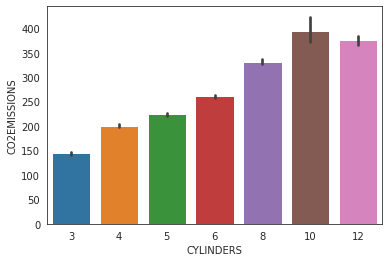

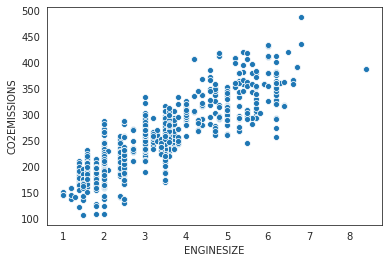

In [6]:
#Analyzing the data using graphs
sns.set_style(style='white') 
sns.barplot(x = 'CYLINDERS', y = 'CO2EMISSIONS', data=data)
plt.show()

sns.scatterplot(x = 'ENGINESIZE', y = 'CO2EMISSIONS', data=data)
plt.show()

We can see that ENGINESIZE and CYLINDERS have a linear trend to CO2EMISSION. Therefore, we can use linear regression using those variables. In this case we want to analyze the CO<sub>2</sub> emission by using variable of engine size. 

In [7]:
data = data[['ENGINESIZE','CO2EMISSIONS']]
data.head()

,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244


In [8]:
#Training the data
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(data[['ENGINESIZE']], data['CO2EMISSIONS'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
print(reg.predict([[2]]))
print(reg.intercept_)

[203.55449907]
125.30409949535732


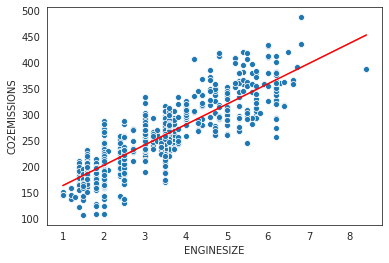

In [10]:
#Plotting the data with linear regression model
sns.set_style(style='white') 
sns.scatterplot(x = 'ENGINESIZE', y = 'CO2EMISSIONS', data=data)
sns.lineplot(x='ENGINESIZE', y = reg.predict(data[['ENGINESIZE']]), data=data, color='red')
plt.show()

In [11]:
#saving the model 
model = data[['ENGINESIZE']]
model['CO2_EMMISION_PREDICTION'] = list(reg.predict(data[['ENGINESIZE']]))
model.to_csv(path_or_buf='/home/afrioni/data_science/model.csv', index= False)
model

,ENGINESIZE,CO2_EMMISION_PREDICTION
0,2.0,203.554499
1,2.4,219.204579
2,1.5,183.991899
3,3.5,262.242299
4,3.5,262.242299
...,...,...
1062,3.0,242.679699
1063,3.2,250.504739
1064,3.0,242.679699
1065,3.2,250.504739
